In [9]:
%load_ext autoreload
%autoreload 2

In [17]:
import numpy as np
from scipy.special import softmax

array = np.random.normal(size=(10, 100, 5))
probabilities = softmax(array, axis=2)

In [21]:
probabilities.shape

(10, 100, 5)

In [26]:
## Alternative test dataset
probabilities[:, :, :] = np.array([0.1, 0.5, 0.15, 0.15, 0.1])

n1, n2, m = probabilities.shape

cum_prob = np.cumsum(probabilities, axis=-1) # shape (n1, n2, m)
r = np.random.uniform(size=(n1, n2, 1))

# argmax finds the index of the first True value in the last axis.
samples = np.argmax(cum_prob > r, axis=-1)

print('Statistics:')
print(np.histogram(samples, bins=np.arange(m+1)-0.5)[0]/(n1*n2))

Statistics:
[0.119 0.471 0.15  0.172 0.088]


In [29]:
cum_prob[0, 0, :]

array([0.1 , 0.6 , 0.75, 0.9 , 1.  ])

In [50]:
a = [[1,2,3], [2,3], [3,4,5,6]]

In [53]:
d = np.array([i + [0]*(len(max(a, key=len))-len(i)) for i in a])

In [54]:
d

array([[1, 2, 3, 0],
       [2, 3, 0, 0],
       [3, 4, 5, 6]])

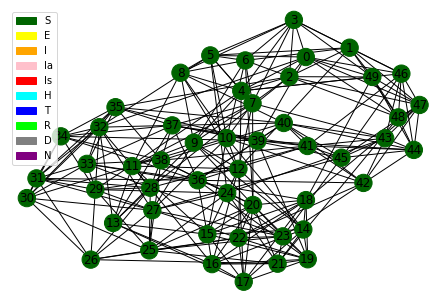

In [260]:
import lib.network as net
from lib.utils import rel
rel(net)
true = net.get_random(50, 10, p_sw=.2)
true.draw()

In [261]:
true.avg_degree()

10.0

In [65]:
type(None) == NoneType


False

In [60]:
a = {2:3}
del a[3]

KeyError: 3

In [252]:
0.0791 / (.0791 + 1/7.5)

0.37235211046602856

In [61]:
from lib.utils import rel
import lib.gridsearch as grid
rel(grid)
grid.get_parameters_for_id(1)

1 0 0.1 0.2 1 

In [62]:
grid.get_job_ids()

0-163


In [234]:
from lib.utils import Event
e = Event(d=5)

{'d': 5}

In [235]:
lambda : x + e.d

<function __main__.<lambda>()>

In [223]:
import lib.network as net
true = net.get_random(10000, 20)

In [224]:
true.avg_degree()

20.0

In [ ]:
! python run.py \
    --netsize 200 \
    --k 10 \
    --multip 3 \
    --model "covid" \
    --dual 2 \
    --overlap 1 \
    --uptake .5 \
    --maintain_overlap False \
    --nnets 4 \
    --niters 4 \
    --separate_traced True \
    --noncomp 0 \
    --presample 1000 \
    --taut .1 \
    --taur .1 \
    --summary_print 1 \
    --summary_splits 200

In [41]:
from collections import defaultdict
trans = defaultdict(dict)
traced_state = 'T'
trans['S']['T'] = 5
trans['E']['T'] = 3
trans['S']['B'] = 2
trans['C']['D'] = 1
traceable_states = trans.keys()
trace_funcs = {
    s : dict(trans[s])[traced_state] for s in traceable_states if traced_state in dict(trans[s])
}

In [42]:
trace_funcs

{'S': 5, 'E': 3}

In [1]:
import numpy as np
import random

In [13]:
lamda = 5
size = 1000

In [14]:
from time import time
t1=time()
one = np.ndarray((size))
for i in range(size):
    one[i] = random.expovariate(lamda)
t2=time()
t2-t1

0.0010020732879638672

In [17]:
t1=time()
many = np.random.exponential(1/lamda, size)
another = 1/lamda * np.random.exponential(1, size)
t2=time()
t2-t1

0.0009772777557373047

In [18]:
import lib.utils as ut
print(ut.get_boxplot_statistics(one))
print(ut.get_boxplot_statistics(many))
print(ut.get_boxplot_statistics(another))

[{'mean': 0.20105419204810884, 'std': 0.20024651834389315, 'whislo': 0.00018273266348763426, 'q1': 0.057981705674683415, 'med': 0.13826596313955647, 'q3': 0.2817590454489187, 'whishi': 0.6126785486330476}]
[{'mean': 0.19215868512980783, 'std': 0.19127853240299986, 'whislo': 0.0007242502321897274, 'q1': 0.056176609390288415, 'med': 0.1275472417538911, 'q3': 0.2623069635623873, 'whishi': 0.5707646057230703}]
[{'mean': 0.19402616138182543, 'std': 0.18234283803734733, 'whislo': 0.0001417339462760744, 'q1': 0.055430650108590725, 'med': 0.13844328190328523, 'q3': 0.28145725687816037, 'whishi': 0.6148854684695858}]


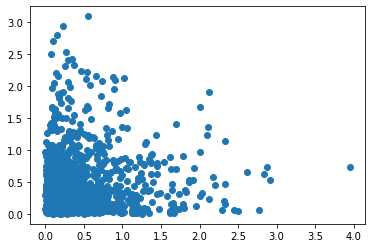

In [7]:
import matplotlib.pyplot as plt
plt.scatter(one, many)

In [58]:
f = iter([1,2])

In [94]:
class Elem(dict):
    
    def __init__(self, size):
        self.size = size

    def get_next_sample(self, lamda):
        try:
            return next(self[lamda])
        except (StopIteration, KeyError):
            self[lamda] = iter(np.random.exponential(1/lamda, self.size))
            return next(self[lamda]) 

In [95]:
el = Elem(500)

In [98]:
el.get_next_sample(5)

0.02512283902114053

In [99]:
el

{5: <iterator at 0x223d67fd848>}

In [74]:
know = net.get_dual(true)

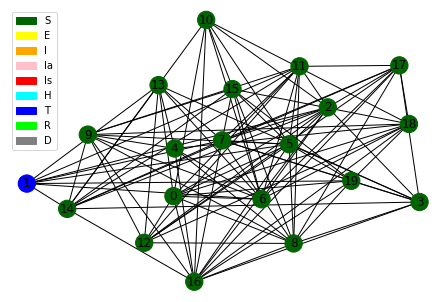

In [75]:
know.draw(pos)

In [60]:
true.change_state(13, 'I')

In [61]:
true.change_traced_state_fast_update(2)

In [49]:
true.update_counts()

In [62]:
true.node_counts

defaultdict(dict,
            {0: Counter({'S': 8, 'I': 1}),
             1: Counter({'S': 10, 'I': 1, 'T': 1}),
             2: Counter({'S': 6}),
             3: Counter({'S': 9}),
             4: Counter({'S': 9, 'T': 1}),
             5: Counter({'S': 13, 'I': 1}),
             6: Counter({'I': 1, 'S': 9}),
             7: Counter({'S': 11, 'T': 1}),
             8: Counter({'S': 10, 'I': 1, 'T': 1}),
             9: Counter({'S': 9, 'I': 1}),
             10: Counter({'I': 1, 'S': 8}),
             11: Counter({'S': 10}),
             12: Counter({'S': 9, 'I': 1, 'T': 1}),
             13: Counter({'S': 12}),
             14: Counter({'S': 6, 'I': 1}),
             15: Counter({'S': 11, 'I': 1, 'T': 1}),
             16: Counter({'S': 11, 'I': 1}),
             17: Counter({'S': 9}),
             18: Counter({'S': 10, 'I': 1}),
             19: Counter({'S': 8})})

In [27]:
a = [True, False, False]
from collections import Counter

In [30]:
Counter(a)[True]

1

In [31]:
a = b = []

In [32]:
a.append(5)

In [34]:
a

[5]

In [18]:
import lib.utils as ut

In [11]:
k = 10
overlap = .5
z_rem = 5

In [12]:
ut.get_z_rem_for_overlap(k, overlap)

5.0

In [13]:
ut.get_overlap_for_z(k, 0, z_rem)

0.5

In [21]:
z_add, z_rem = ut.get_z_for_overlap(10, .8, include_add=False)

In [24]:
len(true.edges) - int(z_rem * 50) == len(dual.edges)

True

In [20]:
from importlib import reload
import lib.gridsearch as grid
reload(grid)

<module 'lib.gridsearch' from 'D:\\OneDrive - University of Southampton\\PhD\\Contact\\lib\\gridsearch.py'>

In [22]:
grid.get_len_grid()

156


In [21]:
grid.get_parameters_for_id(155)

0.5 0.5 1


In [201]:
import glob
import lib.utils as ut
from lib.utils import get_json

In [204]:
import importlib
importlib.reload(ut)

<module 'lib.utils' from 'D:\\OneDrive - University of Southampton\\PhD\\Contact\\lib\\utils.py'>

In [175]:
st = []
for file in glob.glob("data/run/*.json"):
    st.append(get_json(file))

In [195]:
from collections import defaultdict
nested_dict = lambda: defaultdict(nested_dict)
all_sims = nested_dict()
for sim in range(len(st)):
    args = st[sim]['args']
    taut = args['taut']
    taur = args['taur']
    over = args['overlap']
    try:
        results = st[sim][str(taut)]
    except:
        results = st[sim][str(int(taut))]
    all_sims[over][taur][taut] = results

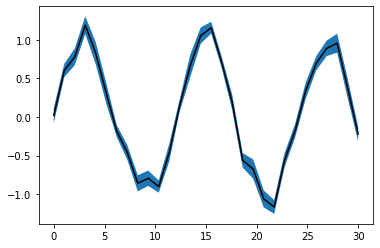

In [58]:
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(0, 30, 30)
y = np.sin(x/6*np.pi)
error = np.random.normal(0.1, 0.02, size=y.shape)
y += np.random.normal(0, 0.1, size=y.shape)

plt.plot(x, y, 'k-')
plt.fill_between(x, y-error, y+error)
plt.show()

In [97]:
a = list(range(0,10000))

In [98]:
a.append(50000)

In [116]:
b = [np.array(a), np.array(a) + 5]

In [140]:
len(a)

10001

In [220]:
len(b)

2

In [141]:
np.std(b, axis=1, ddof=1)

array([2921.61214086, 2921.61214086])

In [31]:
import statsmodels.stats.api as sms
import numpy as np, scipy.stats as st

In [36]:
import time
t0 = time.time()
print(sms.DescrStatsW(a).tconfint_mean())
t1 = time.time()

total = t1-t0
print(total)

(4942.91103440303, 5056.08896559697)
0.003001689910888672


In [38]:
import time
t0 = time.time()
print(st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)))
t1 = time.time()

total = t1-t0
print(total)

(4942.91103440303, 5056.08896559697)
0.005000114440917969


In [40]:
import time
import scipy
t0 = time.time()
print(scipy.stats.norm.interval(.95, loc=np.mean(a), scale=st.sem(a)))
t1 = time.time()

total = t1-t0
print(total)

(4942.917884402576, 5056.082115597424)
0.0039975643157958984


In [48]:
st.sem

In [123]:
B = plt.boxplot(b, showmeans=True)
plt.clf()
boxplot_data = [item.get_ydata() for item in B['whiskers']]

<Figure size 432x288 with 0 Axes>

In [131]:
B['means']

In [159]:
B['medians'][0].get_ydata()

array([5000., 5000.])

In [150]:
mean[0].get_ydata()

array([5003.99960004])

In [70]:
import numpy as np
my_array = np.random.rand(1000, 150)

In [4]:
import lib.utils as ut
from importlib import reload
reload(ut)
lb = ut.get_boxplot_statistics([[2,3], [3,4]], axis=1)

<Figure size 432x288 with 0 Axes>

In [78]:
np.std([[2,3], [3,4]], axis=1, ddof=1)

array([0.70710678, 0.70710678])

In [77]:
lb

[{'mean': 2.5,
  'std': 0.7071067811865476,
  'whislo': 2.0,
  'q1': 2.25,
  'med': 2.5,
  'q3': 2.75,
  'whishi': 3.0},
 {'mean': 3.5,
  'std': 0.7071067811865476,
  'whislo': 3.0,
  'q1': 3.25,
  'med': 3.5,
  'q3': 3.75,
  'whishi': 4.0}]

In [69]:
B['medians'].__len__()

150

In [89]:
np.expand_dims(np.array([[1,2, 3], [2,3,4]]), 1).shape

(2, 1, 3)

In [ ]:
res = []

In [187]:
import tqdm
for i in tqdm.tqdm(range(11)):
    stds = np.std(pt[i], axis=1, ddof=1)
    B = plt.boxplot(pt[i].T, showmeans=True)
    plt.clf()
    means = B['means']
    meds = B['medians']
    whisks = B['whiskers']
    for j in range(len(means)):
        res[i][j]['mean'] = means[i].get_ydata()[0]
        res[i][j]['std'] = stds[i]
        whisk1 = whisks[i].get_ydata()
        whisk2 = whisks[i+1].get_ydata()
        res[i][j]['whislo'] = whisk1[1]
        res[i][j]['q1'] = whisk1[0]
        res[i][j]['med'] = meds[i].get_ydata()[0]
        res[i][j]['q3'] = whisk2[0]
        res[i][j]['whishi'] = whisk2[1]

  9%|███████▌                                                                           | 1/11 [00:05<00:50,  5.02s/it]

1000


 18%|███████████████                                                                    | 2/11 [00:15<01:01,  6.79s/it]

1000


 27%|██████████████████████▋                                                            | 3/11 [00:22<00:53,  6.73s/it]

1000


 36%|██████████████████████████████▏                                                    | 4/11 [00:29<00:47,  6.75s/it]

1000


 45%|█████████████████████████████████████▋                                             | 5/11 [00:35<00:39,  6.65s/it]

1000


 55%|█████████████████████████████████████████████▎                                     | 6/11 [00:42<00:33,  6.70s/it]

1000


 64%|████████████████████████████████████████████████████▊                              | 7/11 [00:48<00:26,  6.61s/it]

1000


 73%|████████████████████████████████████████████████████████████▎                      | 8/11 [00:55<00:20,  6.70s/it]

1000


 82%|███████████████████████████████████████████████████████████████████▉               | 9/11 [01:02<00:13,  6.65s/it]

1000


 91%|██████████████████████████████████████████████████████████████████████████▌       | 10/11 [01:08<00:06,  6.62s/it]

1000


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [01:15<00:00,  6.88s/it]

1000


<Figure size 432x288 with 0 Axes>

In [191]:
res[1000]

{'mean': 0.5141496858384178}

In [58]:
import matplotlib.pyplot as plt
from collections import defaultdict
res = defaultdict(dict)
B = plt.boxplot([[2, 5], [3, 9]], showmeans=True)
plt.clf()
med = B['medians']
mean = B['means']
whiskers = B['whiskers']
std = np.std([[2, 5], [3, 9]], axis=0, ddof=1)
for i in range(len(mean)):
    res[i]['mean'] = mean[i].get_ydata()[0]
    res[i]['std'] = std[i]
    whisk1 = whiskers[2*i].get_ydata()
    whisk2 = whiskers[2*i+1].get_ydata()
    res[i]['whislo'] = whisk1[1]
    res[i]['q1'] = whisk1[0]
    res[i]['med'] = med[i].get_ydata()[0]
    res[i]['q3'] = whisk2[0]
    res[i]['whishi'] = whisk2[1]

<Figure size 432x288 with 0 Axes>

In [82]:
bic = plt.boxplot([3,9], showmeans=True)
f = plt.clf();

<Figure size 432x288 with 0 Axes>

In [55]:
bic['whiskers'][0].get_ydata()

array([4.5, 3. ])

In [50]:
boxplot_data = [item.get_ydata() for item in bic['whiskers']]

In [56]:
import lib.gridsearch as grid
rel(grid)
grid.len_grid()

328

In [57]:
grid.get_job_ids()

0-327


In [61]:
grid.get_parameters_for_id(311)

0.5 0.5 0.5 1


In [111]:
B['means'][0].get_ydata()

array([5003.99960004])

In [118]:
boxplot_data

[array([2500.,    0.]),
 array([7500., 9999.]),
 array([2505.,    5.]),
 array([ 7505., 10004.])]

In [51]:
B['whiskers'][1].get_ydata()

array([7500., 9999.])

In [105]:
B['medians'][0].get_ydata()

array([5000., 5000.])

In [26]:
import pandas as pd

In [119]:
pd.Series(a).describe()

count    10001.000000
mean      5003.999600
std       2921.612141
min          0.000000
25%       2500.000000
50%       5000.000000
75%       7500.000000
max      50000.000000
dtype: float64

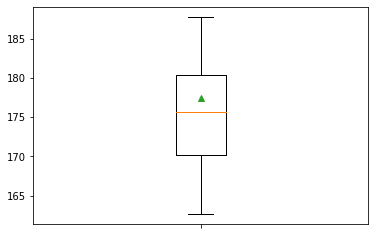

In [87]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
boxes = [
    {
    'label' : None,
    'whislo': 162.6,    # Bottom whisker position
    'q1'    : 170.2,    # First quartile (25th percentile)
    'med'   : 175.7,    # Median         (50th percentile)
    'q3'    : 180.4,    # Third quartile (75th percentile)
    'whishi': 187.8,    # Top whisker position
    'std': 25,
    'mean': 177.4
    }
]
ax.bxp(boxes, showfliers=False, showmeans=True)
plt.show()

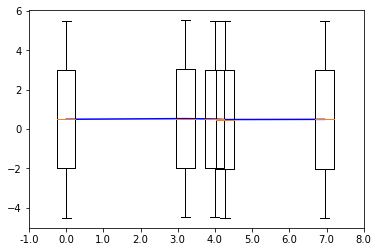

In [19]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# Generate some data...
data = np.random.random((100, 5))
y = data.mean(axis=0)
x = np.random.random(y.size) * 10
x -= x.min()
x.sort()



boxes = [
    {
    'whislo': yi - 5,    # Bottom whisker position
    'q1'    : yi - 2.5,    # First quartile (25th percentile)
    'med'   : yi,    # Median         (50th percentile)
    'q3'    : yi + 2.5,    # Third quartile (75th percentile)
    'whishi': yi + 5,    # Top whisker position
    }
    for yi in y
]

# Plot a line between the means of each dataset
ax.plot(x, y, 'b-')

# Save the default tick positions, so we can reset them...
locs = ax.get_xticks() 

ax.bxp(boxes, positions=x, showfliers=False)

# Reset the xtick locations.
ax.set_xticks(locs)
ax.set_xticklabels(locs)
plt.show()

In [11]:
locs

array([-2.,  0.,  2.,  4.,  6.,  8., 10.])

In [11]:
class A:
    def cartof(self, i):
        print(i)
    def cartof(self, i):
        print(i+1)

In [12]:
a= A()
a.cartof(2)

3


In [83]:
B = plt.boxplot(data)
plt.clf()
boxplot_data = [item.get_ydata() for item in B['whiskers']]

<Figure size 432x288 with 0 Axes>

In [85]:
len(boxplot_data)

10

In [80]:
import random
import lib.network as net
from importlib import reload
reload(net)
first_inf = random.sample(range(7), 5)
netw = net.get_random(20, 5)
netw.change_state(first_inf)

For taut = 0.1
Simulating network - No. 0
Running iteration 0:                                                                                                   
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

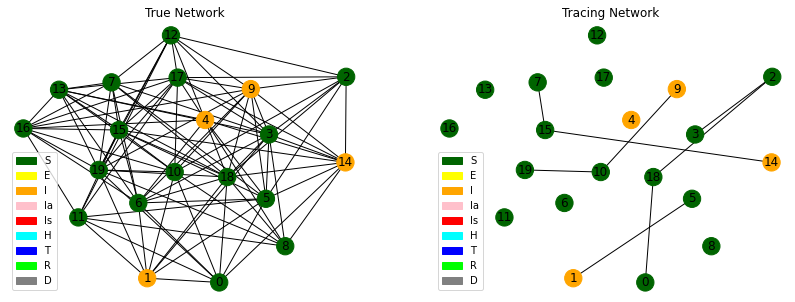

Final state:                                                                                                           
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

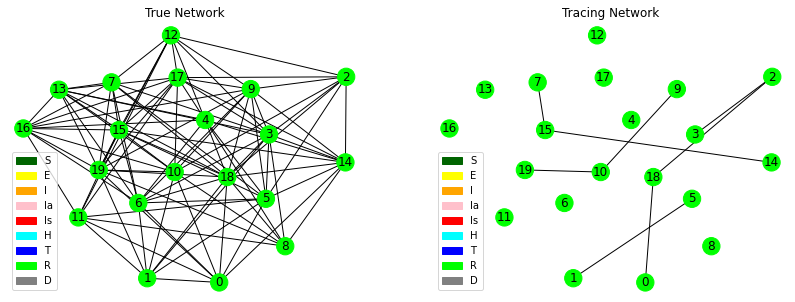

---> Result:20 total infected persons over time.                                                                       
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.45s/it]


(<lib.stats.StatsProcessor at 0x199da33d188>,
 <lib.network.Network at 0x199d9b67308>)

In [83]:
import run
reload(run)
run.run_mock(netsize=20, k=10 ,first_inf=4, draw=True)

In [291]:
import lib.network as net
from importlib import reload
reload(net)
true = net.get_random(10000, 5, weighted=True, typ='ws')


KeyboardInterrupt



In [122]:
len(true.node_list)

9929

In [123]:
np.append(a,1)

array([2, 1])

In [134]:
np.array([], dtype=np.uint8)

array([], dtype=uint8)

In [ ]:
np.array

In [127]:
lat = np.full(shape = 100, fill_value = 'S')

In [128]:
lat

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S'], dtype='<U1')

In [135]:
n = 20
state = 'S'
lic = np.full(shape=n, fill_value = state)

In [145]:
lic[1] = 'I'

In [146]:
lic

array(['S', 'I', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S'], dtype='<U1')

In [140]:
vs = [state] * n

In [147]:
vs[1] = 'I'

In [148]:
vs[1]

'I'

In [60]:
from scipy.stats import poisson
from collections import Counter
import lib.network as net
from lib.utils import rel
import lib.utils as ut
from time import time
rel(ut, net)

import matplotlib.pyplot as plt

n = 1000
k = 10
p = .1

t1 = time()
rand = net.get_random(n, k, typ='random', p=p)
t2 = time()
binom = net.get_random(n, k, typ='binomial', p=None)
t3 = time()

print('Time Rand:', t2 - t1)
print('Avg degree:', rand.avg_degree())
print('Time Binom:', t3 - t2)
print('Avg degree:', binom.avg_degree())

# degrees = Counter([true.degree(nid) for nid in true.node_list])
    
# for degree in sorted(degrees.keys()):
#     vPoi = poisson.pmf(k=degree, mu=k)
#     vNet = degrees[degree] / n
#     plt.scatter(degree, vPoi, c='r')
#     plt.scatter(degree, vNet, c='b')

Time Rand: 0.3990175724029541
Avg degree: 10.0
Time Binom: 0.587409257888794
Avg degree: 10.108


In [95]:
import networkx as nx
n=50
d = net.get_random(n, k, typ='barabasi', seed=31, p=None)
d.edges

EdgeView([(0, 10), (0, 11), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 21), (0, 26), (0, 29), (0, 30), (0, 31), (0, 37), (0, 38), (0, 43), (0, 47), (0, 48), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 18), (1, 19), (1, 22), (1, 27), (1, 29), (1, 33), (1, 43), (1, 45), (1, 46), (2, 10), (2, 11), (2, 12), (2, 13), (2, 16), (2, 28), (2, 29), (2, 34), (2, 36), (2, 38), (2, 41), (2, 42), (2, 47), (2, 48), (2, 49), (3, 10), (3, 12), (3, 23), (3, 28), (3, 32), (3, 42), (3, 43), (4, 10), (4, 11), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 22), (4, 25), (4, 28), (4, 35), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 17), (5, 19), (5, 20), (5, 26), (5, 30), (6, 10), (6, 11), (6, 12), (6, 13), (6, 15), (6, 16), (6, 17), (6, 19), (6, 20), (6, 21), (6, 23), (6, 25), (6, 29), (6, 32), (6, 40), (6, 45), (6, 46), (6, 47), (6, 48), (7, 10), (7, 11), (7, 12), (7, 14), (7, 41), (8, 10), (8, 11), (8, 12), (8, 37), (8, 47), (8, 48), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), 

In [68]:
seed = 3
seed.random()

AttributeError: 'int' object has no attribute 'random'